# Predicción de comportamiento de consumo con regresión logística

### Pasos de este estudio
1. Carga de datos
1. Desarrollo

# 1. Carga de datos

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Paso 1: Lee el archivo CSV
data = pd.read_csv('compras_online.csv')

data.head(25)

,Purchasing behaviour,Gender_male,Age,Time spent in online shop
0,1.0,0,22,40
1,1.0,0,25,23
2,1.0,1,18,12
3,1.0,1,45,28
4,1.0,0,12,43
5,1.0,1,43,23
6,1.0,1,23,55
7,1.0,1,33,34
8,0.5,0,27,28
9,0.5,0,27,15


In [46]:
# pruebas de parametro
w = 0.09
b = -3.6

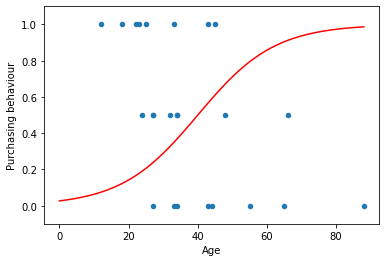

In [60]:
# puntos de la recta
x = np.linspace(0,data['Age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='Age',y='Purchasing behaviour')
plt.plot(x, y, '-r')
plt.ylim(-0.10,1.1)
# plt.grid()
plt.show()

In [68]:
# calculo de las predicciones
data['sigmoid'] = 1/(1+np.exp(-(data['Age']*w+b)))

# calculo de la funcion de error
data['loss_xi'] = -data['Age']*np.log(data['sigmoid'])-(1-data['Purchasing behaviour'])*np.log(1-data['sigmoid'])
cost_j = data['loss_xi'].mean()
cost_j

29.390592789615564

In [70]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [78]:
def sum_error_df(df):
    data['sigmoid'] = 1/(1+np.exp(-(data['Age']*df['w']+df['b'])))
    data['loss_xi'] = -data['Purchasing behaviour']*np.log(data['sigmoid'])-(1-data['Age'])*np.log(1-data['sigmoid'])
    j_cost = data['loss_xi'].mean()
    return(j_cost)

In [80]:
df['error'] = df.apply(sum_error_df, axis=1)
df.sort_values(by=['error']).head()
df_3d = df.pivot(index='w', columns='b', values='error')

df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,-7.389082,-7.463277,-7.537936,-7.613063,-7.688659,-7.764728,-7.841270,-7.918288,-7.995784,-8.073761,...,-16.181375,-16.305932,-16.431140,-16.557001,-16.683516,-16.810687,-16.938516,-17.067004,-17.196154,-17.325967
0.06,-12.630176,-12.731368,-12.833093,-12.935354,-13.038152,-13.141489,-13.245366,-13.349786,-13.454751,-13.560261,...,-24.075443,-24.231320,-24.387870,-24.545094,-24.702994,-24.861570,-25.020823,-25.180755,-25.341366,-25.502658
0.07,-19.488065,-19.617060,-19.746627,-19.876767,-20.007482,-20.138774,-20.270643,-20.403091,-20.536119,-20.669730,...,-33.537390,-33.722660,-33.908596,-34.095198,-34.282466,-34.470402,-34.659005,-34.848276,-35.038216,-35.228824
0.08,-27.832844,-27.988886,-28.145517,-28.302736,-28.460546,-28.618948,-28.777942,-28.937529,-29.097710,-29.258487,...,-44.329586,-44.541529,-44.754110,-44.967329,-45.181186,-45.395681,-45.610813,-45.826583,-46.042990,-46.260034
0.09,-37.487089,-37.668644,-37.850786,-38.033517,-38.216837,-38.400747,-38.585247,-38.770338,-38.956021,-39.142296,...,-56.227109,-56.462751,-56.698990,-56.935826,-57.173256,-57.411283,-57.649903,-57.889118,-58.128925,-58.369326


In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

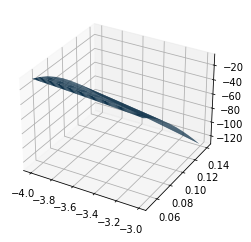

In [84]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

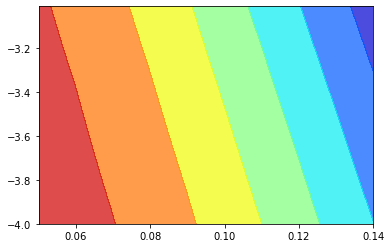

In [86]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [94]:
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['Age']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['Purchasing behaviour'])*data['Age']
    derivative = data['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['Age']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['Purchasing behaviour'])
    derivative = data['partial_loss'].mean()
    return(derivative) 

In [96]:
w_0 = 0.09
b_0 = -3.57

alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)


0.08449068643713188 -3.5637720846316725


In [100]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_data = np.array(data['Purchasing behaviour']).reshape((-1, 1))
Y_data = np.array(data['Age'])

# creando modelo
model = LogisticRegression()
model.fit(X_data, Y_data)

# imprimiendo parametros
print(f"Intercept (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")

Intercept (b): [-0.41879731 -0.41879731 -0.41879731 -0.41879731 -0.18511652 -0.41879731
  1.0794526  -0.18511652  0.51130581  1.0794526   0.51130581  0.01793327
 -0.41879731 -0.18511652  0.01793327  0.01793327 -0.18511652  0.01793327]
Pendiente (w): [[ 0.42080985]
 [ 0.42080985]
 [ 0.42080985]
 [ 0.42080985]
 [-0.00863293]
 [ 0.42080985]
 [-0.35438612]
 [-0.00863293]
 [-0.01512665]
 [-0.35438612]
 [-0.01512665]
 [-0.43782547]
 [ 0.42080985]
 [-0.00863293]
 [-0.43782547]
 [-0.43782547]
 [-0.00863293]
 [-0.43782547]]
